In [1]:
#Naive-Bayes
import pandas as pd

data = pd.read_csv(r'C:\Users\Azizg\Desktop\Dominos_Yorumlar.csv') 

species=data[["Sentiment_Analysis"]].values

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
vectorizer=TfidfVectorizer(analyzer="word",lowercase=True)
svd = TruncatedSVD(n_components=100)
X_tfidf = vectorizer.fit_transform(data.iloc[:,0].astype(str))
X_svd = svd.fit_transform(X_tfidf)
a = X_svd

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(a,species,test_size=0.30,random_state=0)

from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

gnb.fit(x_train, y_train.ravel())

result=gnb.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,result))
print(classification_report(y_test,result))
print(accuracy_score(y_test, result))

[[9169 1083  539]
 [ 317  350  114]
 [2101 1401 3980]]
              precision    recall  f1-score   support

          -1       0.79      0.85      0.82     10791
           0       0.12      0.45      0.19       781
           1       0.86      0.53      0.66      7482

    accuracy                           0.71     19054
   macro avg       0.59      0.61      0.56     19054
weighted avg       0.79      0.71      0.73     19054

0.7084601658444422


In [2]:
#SVM
import pandas as pd

data = pd.read_csv(r'C:\Users\Azizg\Desktop\Dominos_Yorumlar.csv') 

label=data[["Sentiment_Analysis"]].values

features=data[["Description"]]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(analyzer="word",lowercase=True)
sentence_train_vector=vectorizer.fit_transform(data.iloc[:,0].astype(str))

features=sentence_train_vector

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.30,random_state=0)

from sklearn.svm import SVC
svc=SVC(kernel='poly')
svc.fit(x_train,y_train.ravel())
result=svc.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,result))
print(classification_report(y_test,result))
print(accuracy_score(y_test, result))

[[10582     6   203]
 [  512   111   158]
 [ 2498    16  4968]]
              precision    recall  f1-score   support

          -1       0.78      0.98      0.87     10791
           0       0.83      0.14      0.24       781
           1       0.93      0.66      0.78      7482

    accuracy                           0.82     19054
   macro avg       0.85      0.60      0.63     19054
weighted avg       0.84      0.82      0.81     19054

0.8219271544032749


In [3]:
#Random Forest
import pandas as pd

data = pd.read_csv(r'C:\Users\Azizg\Desktop\Dominos_Yorumlar.csv') 

label=data[["Sentiment_Analysis"]].values

features=data[["Description"]]

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(analyzer="word",lowercase=True)
sentence_train_vector=vectorizer.fit_transform(data.iloc[:,0].astype(str))

features=sentence_train_vector

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.30,random_state=0)

from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(x_train, y_train.ravel())

predictions = text_classifier.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[10071     4   716]
 [  358   141   282]
 [ 1231    19  6232]]
              precision    recall  f1-score   support

          -1       0.86      0.93      0.90     10791
           0       0.86      0.18      0.30       781
           1       0.86      0.83      0.85      7482

    accuracy                           0.86     19054
   macro avg       0.86      0.65      0.68     19054
weighted avg       0.86      0.86      0.85     19054

0.8630208880025192


-1    36147
 1    24907
Name: Sentiment_Analysis, dtype: int64
74721
108441
24907
36147
(42737, 100) (42737, 2)
(18317, 100) (18317, 2)
Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 64)            41024     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 70)                37800     
_________________________________________________________________
dense_1 (Dense)              (None,

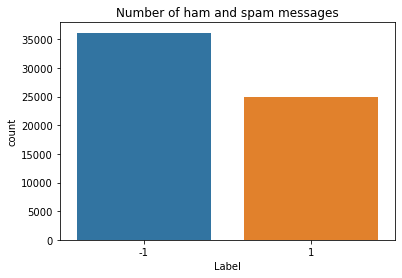

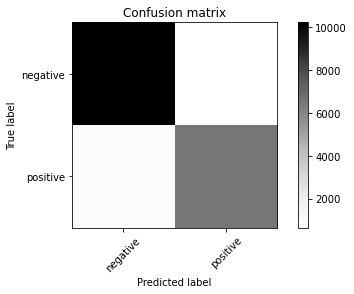

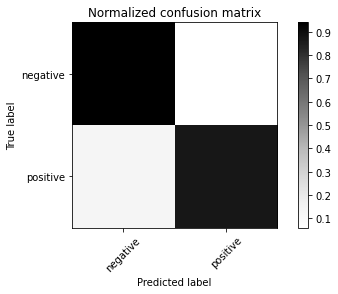

In [2]:
#LSTM
import numpy as np
import pandas as pd 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
import re
import warnings 
warnings.filterwarnings('ignore')

data = pd.read_csv(r'C:\Users\Azizg\Desktop\Dominos_Yorumlar.csv')
data = data[data.Sentiment_Analysis != 0]
print(data.Sentiment_Analysis.value_counts())
sns.countplot(data.Sentiment_Analysis)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

# Embedding
max_features = 20000
maxlen = 100
embedding_size = 128

# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
epochs = 2


data['Description'] = data['Description'].apply(lambda x: str(x).lower())
data['Description'] = data['Description'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print(data[ data['Sentiment_Analysis'] == 1].size)
print(data[ data['Sentiment_Analysis'] == -1].size)

print((data['Sentiment_Analysis'].values == 1).sum())
print((data['Sentiment_Analysis'].values == -1).sum())

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')

tokenizer = Tokenizer(nb_words = max_features, split=' ')
tokenizer.fit_on_texts(data['Description'].values)
X = tokenizer.texts_to_sequences(data['Description'].values)
X = pad_sequences(X, maxlen = maxlen)

Y = pd.get_dummies(data['Sentiment_Analysis']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

print('Build model...')

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

print('Train...')
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,shuffle=True, validation_data=(X_test, Y_test))

yhat = model.predict(X_test, verbose = 2, batch_size = batch_size)
from sklearn import metrics
print(metrics.classification_report(Y_test[:,1], np.round(yhat[:,1]) ,target_names = ["negative", "positive"]))

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

score = ['negative', 'positive']

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Greys):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(set(score)))
    plt.xticks(tick_marks, score, rotation=45)
    plt.yticks(tick_marks, score)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cm = confusion_matrix(Y_test[:,1], np.round(yhat[:,1]))
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cm)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

In [6]:
data = pd.read_csv(r'C:\Users\Azizg\Desktop\Dominos_Yorumlar.csv')
print(data.Sentiment_Analysis.value_counts())

-1    36147
 1    24907
 0     2459
Name: Sentiment_Analysis, dtype: int64


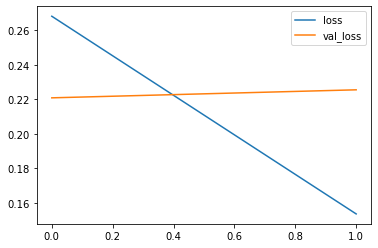

In [1]:
#LSTM greafik
import numpy as np
import pandas as pd 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
import re
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation
from keras.utils.np_utils import to_categorical
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output
import warnings 
warnings.filterwarnings('ignore')

data = pd.read_csv(r'C:\Users\Azizg\Desktop\Dominos_Yorumlar.csv')
data = data[data.Sentiment_Analysis != 0]
print(data.Sentiment_Analysis.value_counts())
sns.countplot(data.Sentiment_Analysis)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

# Embedding
max_features = 20000
maxlen = 100
embedding_size = 128

# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
epochs = 2


data['Description'] = data['Description'].apply(lambda x: str(x).lower())
data['Description'] = data['Description'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print(data[ data['Sentiment_Analysis'] == 1].size)
print(data[ data['Sentiment_Analysis'] == -1].size)

print((data['Sentiment_Analysis'].values == 1).sum())
print((data['Sentiment_Analysis'].values == -1).sum())

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')

tokenizer = Tokenizer(nb_words = max_features, split=' ')
tokenizer.fit_on_texts(data['Description'].values)
X = tokenizer.texts_to_sequences(data['Description'].values)
X = pad_sequences(X, maxlen = maxlen)

Y = pd.get_dummies(data['Sentiment_Analysis']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

print('Build model...')

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

print('Train...')
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,shuffle=True, validation_data=(X_test, Y_test),callbacks=[plot_losses],verbose=0)
